In [30]:
#Q1
def myLCG(seed, n, scale = 32768, sgn = 1): # takes seed, the number of random numbers to be generated (n), the +-range (scale) in which the numbers are to be generated and 'sgn'.
# By default, scale = RANDMAX
# 'sgn' decides whether negative random numbers will be generated.
  random = [0] * n # blank array to store 'n' random numbers
  r = seed # the next random number
  a = 1103515245 # multiplier
  c = 12345 # increment
  m = 32768 # modulus: RANDMAX
  
  # b: base - decides whether negative random numbers will be generated, based on input 'sgn'
  # By default 'sgn' = 1; the function generates only positive random numbers within specified range
  # If 'sgn' is negative, negative numbers are generated
  if sgn >= 0: b = 0
  else: b = 1

  for i in range(n):
    r = (a*r + c)%m
    r = ((-1)**(b*(int(r))))*r
    r = (r*scale)/m
    random[i] = r
  del(r)
  del(a)
  del(c)
  del(m)
  del(b)
  return(random)

print(myLCG(2, 50, 2, -1))

[-1.20428466796875, 0.29678812995553017, 0.39129278373366105, -1.5845403187850025, 0.8522280023171334, -1.0582136750454083, 0.6492993112769909, -1.1563453466733336, 1.1647009989246726, -1.1223864810017403, 0.4038350022456143, 0.3434108059445862, 0.5788975578288955, -1.371176602493506, 1.5867041693854844, -0.3970472378132399, -0.34137499690405093, -0.046365634276298806, 1.8784626470778676, -1.2715584400430089, -1.1912539136537816, 1.9601206749503035, -1.203115682961652, -1.0316988055565162, 0.5112805232929531, 1.145808432091144, -0.6470741042867303, 0.22548064411967061, -1.602126371833947, -0.3748330505914055, -0.5385340898319555, 0.7455394432108733, 1.239644287743431, 0.7946107203897554, 0.34843692184222164, 1.1040145120277884, -1.6917556091502775, -1.5566093998641009, -0.0897057900292566, 0.7791832242637611, -1.2568129464270896, 0.3478091026772745, 0.8183687831260613, -0.5305915348799317, -1.7022334012508509, 1.8435163259273395, -1.5241129887581337, 0.8278077933209715, 0.2783727722926

In [31]:
#Q2
# Volume of positive octant of unit sphere by throwing method
# takes seed and number of trials as input
def Vol_sphere_octant(seed, n):
  sample = myLCG(seed, n, 1, -1)
  x = 0
  y = 0
  z = 0
  ins = 0
  tot = 0 
  for i in range(n-3):
    x = sample[i]
    y = sample[i+1]
    z = sample[i+2]
    ck = ((x*x) + (y*y) + (z*z))
    if ck <= 1.0000000000000000:
      ins = ins + 1
      tot = tot + 1
    else:
      tot = tot + 1
  del(sample)
  Vol = (ins/tot)
  return Vol

print(Vol_sphere_octant(12,500000))  


0.5239951439708638


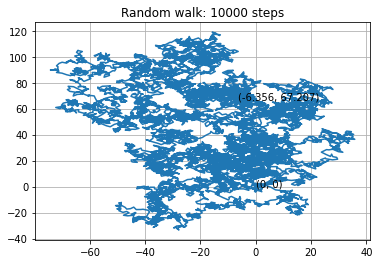

The rms distance covered for 10000 steps: 1.646378507909185
The displacement after 10000 steps: 67.50673979040182


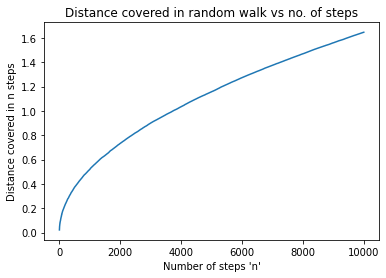

In [35]:
#Q3

def gen_ranwalk(n, origin = [0,0], ls = 0):
# Input: number of steps (n)
# Input: origin of random walk (origin); Default - (0,0)
# Input: max step length (ls); Default - 0 > the max step length is fixed for each simulation, as 2*sqrt(2)
# (ls): Non zero value for 'ls' leads to different max step length for each simulation

  import time
  t = time.localtime()
  ct = time.strftime("%H%M%S", t)
  ct = int(ct)

  if ct > n: 
    seed1 = ct%n
    seed2 = n - (ct%n)
  elif ct == n: 
    seed1 = int(n/3)
    seed2 = int(n/2)
  else: 
    seed1 = 0
    seed2 = (n%ct)

  if ls == 0: t = 1
  else: t = ct%5

  x = myLCG(seed1, n, 2*t, -1)
  y = myLCG(x[seed1], n, 2*t, -1)
  ran_arr = [0] * int(n+1)

  for l in range(n+1): ran_arr[l] = [0] * 2
  ran_arr[0][0] = origin[0]
  ran_arr[0][1] = origin[1]

  for i in range(1,n):
    ran_arr[i][0] = x[i]
    ran_arr[i][1] = y[i]
  del(x)
  del(y)
  return(ran_arr)

def plot_ranwalk(n, origin = [0,0], ls = 0):
# takes the same inputs as random_walk()

  val = gen_ranwalk(n, origin, ls)
  X = [0] * (n+1)
  Y = [0] * (n+1)

  for i in range(1, (n+1)):
    X[i] = val[i][0] + ((X[i-1]))
    Y[i] = val[i][1] + ((Y[i-1]))
  
  del(val)

  import matplotlib.pyplot as plt

  plt.plot(X,Y)
  plt.xlabel("")
  plt.ylabel("")
  a = "Random walk: " + str(n) + " steps"
  plt.title(a)
  A = 0, round(X[n],3)
  B = 0, round(Y[n],3)
  for xy in zip(A, B):                                       # <--
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--
  plt.grid()
  del a
  plt.show()

  
def ranwalkdist(n, origin = [0,0], ls = 0):
# takes the same inputs as random_walk()

  val = gen_ranwalk(n, origin, ls)
  X = [0] * (n+1)
  Y = [0] * (n+1)

  for i in range(1, (n+1)):
    X[i] = val[i][0] + ((X[i-1]))
    Y[i] = val[i][1] + ((Y[i-1]))
  
  del(val)
  
  x = [0] * n
  y = [0] * n

  dist = 0
  sum = 0
  for i in range(n):
    dist = dist + ((((X[i+1] - X[i])**2)+((Y[i+1] - Y[i])**2))**(0.5))
    sum = sum + (((X[i+1] - X[i])**2)+((Y[i+1] - Y[i])**2))
    x[i] = int(i+1)
    y[i] = (sum/n)**(0.5)

  rms = (sum/n)**(0.5)
  disp = ((((X[n])**2)+((Y[n])**2))**(0.5))

  del sum
  del dist
  del X
  del Y

  print("The rms distance covered for", n, "steps:", rms)
  print("The displacement after", n, "steps:", disp)

  import matplotlib.pyplot as plt

  plt.plot(x,y)
  plt.xlabel("Number of steps 'n'")
  plt.ylabel("Distance covered in n steps")
  plt.title("Distance covered in random walk vs no. of steps")
  # plt.annotate()
  plt.show()


# print(gen_ranwalk(50))
print()
plot_ranwalk(10000)
ranwalkdist(10000)